In [1]:
# Build out of simple moving average crossover strategy

# gets stock data, iterates and optimises MA strategy 
# finding best two moving averages to trade with over data period (subject to overfitting)

# Long only or long-short 

# =============
# Params
# =============

# df - DataFrame, time indexed stock data with stock symbol for column name

# symbol  - stock symbol or ticker to be sampled (must be in df)

# long_short - bool, true - long short, false - long only 

# MA1 - list of potential first leg moving average values to be tested

# MA2 - list of potential second leg moving average values to be tested


# =============
# Returns
# =============
# MA1, MA2 - two, historically tested, best performing MA legs

# strategy performance & outperformance of market 

# graphical output of strategy

import numpy as np
import pandas as pd
import datetime as dt
from pylab import mpl, plt
from itertools import product

plt.style.use('seaborn')
%matplotlib inline 


def Moving_Average_Backtest(df, symbol, long_short = True, MA1 = range(10, 50, 1), MA2 = range(15, 200, 5)):
    
    #define long-short
    if long_short == True:
        long = 1
        short = -1
    else:
        long = 1
        short = 0
    
    #get ticker data from dataframe 
    data = (pd.DataFrame(df[symbol]))
    
    #empty df to store results
    results = pd.DataFrame()
    
    #using itertools produt iterate over possible MA's 
    for SMA1, SMA2 in product(MA1, MA2):
        data = pd.DataFrame(df[symbol])
        data.dropna(inplace =True)
        data['SMA1'] = data[symbol].rolling(SMA1).mean()
        data['SMA2'] = data[symbol].rolling(SMA2).mean()
        data['Returns'] = np.log(data[symbol] / data[symbol].shift(1))
        data.dropna(inplace=True)
        data['Position'] = np.where(data['SMA1'] > data['SMA2'], long, short)
        data['Strategy'] = data['Position'].shift(1) * data['Returns']
        data.dropna(inplace=True)
        perf = np.exp(data[['Returns', 'Strategy']].sum())
        results = results.append(pd.DataFrame(
            {'SMA1': SMA1, 'SMA2': SMA2,
             'MARKET': perf['Returns'],
             'STRATEGY': perf['Strategy'],
             'OUT_PERFORMANCE': perf['Strategy'] - perf['Returns']},index=[0]), ignore_index=True)
        
    #get top reult 
    result_1 = results.sort_values('OUT_PERFORMANCE', ascending=False).head(1)
    
    #store optimal SMA's for visualisation of backtesting 
    SMA1 = result_1['SMA1'].item()
    SMA2 = result_1['SMA2'].item()
    
    
    opt_data = (pd.DataFrame(raw[symbol]))
    
    opt_data['SMA1'] = opt_data[symbol].rolling(SMA1).mean()
    opt_data['SMA2'] = opt_data[symbol].rolling(SMA2).mean()
    
    opt_data.dropna(inplace=True)

    opt_data['Position'] = np.where(opt_data['SMA1'] > opt_data['SMA2'], long, short)
    
    opt_data['Returns'] = np.log(opt_data[symbol] / opt_data[symbol].shift(1))

    opt_data['Strategy'] = opt_data['Position'].shift(1) * opt_data['Returns']

    opt_data.dropna(inplace = True)

    return_comp = opt_data[['Returns', 'Strategy']].cumsum().apply(np.exp)
    plt.plot(return_comp.index, return_comp['Returns']*10000)
    plt.plot(return_comp.index, return_comp['Strategy']*10000)
    plt.legend(['Stock Returns', 'Strategy Returns'])
    #plt.subplot(212);
    print (SMA1, SMA2)
                                             

In [2]:
raw = pd.read_csv('Weekly.csv', parse_dates = True)

#Moving_Average_Backtest(raw, 'A:TLS')

44 45


C:\Users\cranwemd\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:80: FutureWarning: `item` has been deprecated and will be removed in a future version
C:\Users\cranwemd\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:81: FutureWarning: `item` has been deprecated and will be removed in a future version


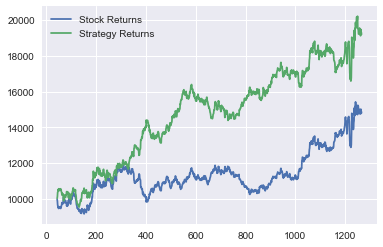

In [37]:
raw = pd.read_csv('BTC-USD-5Y.csv')

raw = pd.DataFrame(data['Adj Close'])

#data
Moving_Average_Backtest(raw, 'Adj Close')

In [42]:
raw = pd.read_csv('ASX_200_daily.csv')

#Moving_Average_Backtest(raw, 'WBC')

raw.head()

,Unnamed: 0,XJO,CBA,CSL,BHP,WBC,NAB,ANZ,WOW,MQG,...,MYX,WSA,OML,SXL,EHE,HUB,PLS,ORE,GXY,SDA
0,1-Jan-08,6339.836,58.846,36.36,36.367,27.603,35.923,27.46,33.658,74.935,...,0.2986,5.45,NaN,3.0954,NaN,5.9926,0.300,0.2411,1.8203,NaN
1,2-Jan-08,6353.162,58.547,36.57,36.512,27.741,35.629,27.57,33.668,75.722,...,0.2986,5.57,NaN,3.1104,NaN,5.9926,0.300,0.2226,1.8203,NaN
2,3-Jan-08,6290.713,57.502,36.50,36.331,27.277,35.125,27.33,33.371,72.477,...,0.3092,5.55,NaN,3.0954,NaN,5.6772,0.325,0.2226,1.7100,NaN
3,4-Jan-08,6306.817,57.790,35.49,37.010,27.326,35.486,27.41,33.321,71.985,...,0.3092,5.66,NaN,3.0804,NaN,5.6772,0.375,0.2411,1.8203,NaN
4,7-Jan-08,6161.624,56.954,34.50,36.258,26.842,34.507,26.69,32.856,70.205,...,0.3092,5.40,NaN,2.9680,NaN,5.6772,0.325,0.2318,1.8479,NaN


C:\Users\cranwemd\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:80: FutureWarning: `item` has been deprecated and will be removed in a future version
C:\Users\cranwemd\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:81: FutureWarning: `item` has been deprecated and will be removed in a future version


43 15


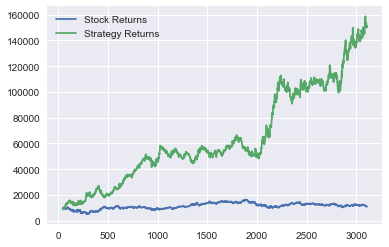

In [43]:
Moving_Average_Backtest(raw, 'ANZ')

C:\Users\cranwemd\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:80: FutureWarning: `item` has been deprecated and will be removed in a future version
C:\Users\cranwemd\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:81: FutureWarning: `item` has been deprecated and will be removed in a future version


26 25


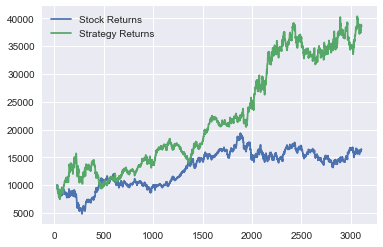

In [44]:
Moving_Average_Backtest(raw, 'CBA')

In [ ]:
Moving_Average_Backtest(raw, 'WOW')